<a href="https://colab.research.google.com/github/SteffanBurnette/Deeplearning-with-python-/blob/main/Deeplearning_concepts_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing the basic mnist datset via tflow datasets
from tensorflow.keras.datasets import mnist
#This is destructured into 4 numpy arrays
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images.shape #contains 60000 samples of shape 28 * 28

(60000, 28, 28)

In [ ]:
#There are 10 categories (0-9)
len(train_labels)

60000

In [ ]:
print(f"The test set: {test_images.shape}")
print(f"The test set labels: {len(test_labels)}")

The test set: (10000, 28, 28)
The test set labels: 10000


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"] )

Before training, we’ll preprocess the data by reshaping it into the shape the model
expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values
in the [0, 255] interval. We’ll transform it into a float32 array of shape (60000, 28 *
28) with values between 0 and 1.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1681 - loss: 2.2806
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5536 - loss: 1.8795
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7143 - loss: 1.1676
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7962 - loss: 0.8075
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8316 - loss: 0.6378


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([5.6492287e-04, 4.6185756e-05, 9.1516114e-05, 1.1160700e-03,
       9.1849023e-04, 2.1414652e-03, 6.9213488e-06, 9.6817678e-01,
       3.7018704e-04, 2.6567418e-02], dtype=float32)

In [ ]:
print(predictions[0].argmax())
print(predictions[0][7])


7
0.9681768


In [ ]:
print(test_labels[0])

7


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8310 - loss: 0.6052
test_acc: 0.8526999950408936


TypeError: Invalid shape (784,) for image data

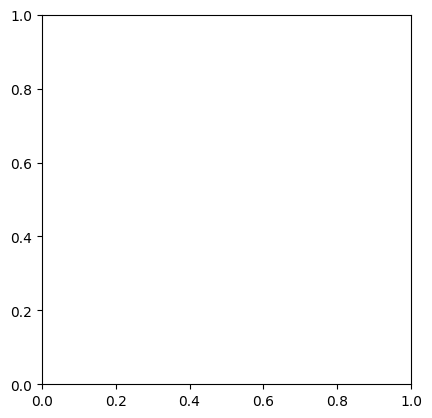

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#Creating a Simple Dense Layer from Scratch
What better demonstrates full, unambiguous understanding than implementing everything from scratch? Of course, what “from scratch” means here is relative:
*  We won't reimplement basic **tensor operations**, and we won't implement **backpropagation**. But we'll go to such a low level that we will barely use any **Keras** functionality at all.

 The **Dense layer** implements the following **input transformation**, where **W** and **b** are **model parameters**, and **activation** is an **element-wise function** (usually **relu**, but it would be **softmax** for the last layer):
 * **output = activation(dot(W, input) + b)**



In [ ]:
'''A simple Python class, NaiveDense, that creates two TensorFlow
variables, W and b, and exposes a __call__() method that applies the preceding
transformation.
'''
import tensorflow as tf
class NaiveDense:
 def __init__(self, input_size, output_size, activation): #On instantiation the layer takes in the input size. output size and activation function
  self.activation = activation
  w_shape = (input_size, output_size)  #Creates a matrix, W, of shape (input_size, output_size), initialized with random values.
  w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1) #Creates random initial weight values
  self.W = tf.Variable(w_initial_value) #Sets the random intial weight values

  b_shape = (output_size,) #Create a vector, b, of shape (output_size,), initialized with zeros.
  b_initial_value = tf.zeros(b_shape) #Initializes the bias vector with zeros
  self.b = tf.Variable(b_initial_value) #Capsulates the values into a tensor

 def __call__(self, inputs): #Applys the forward pass
  return self.activation(tf.matmul(inputs, self.W) + self.b) # ActivationFunction(X^T * W + b)

 @property
 def weights(self):           #Convenience method for retrieving the layer’s weights
  return [self.W, self.b]


##Creating a Simple Sequential Class
Let's create a **NaiveSequential** class to **chain these layers**. It wraps a list of **layers** and exposes a __call__() method that simply calls the **underlying layers** on the **inputs**, in order. It also features a **weights property** to easily keep track of the layers' parameters.

* This class will give me further insight into how the Squential API in keras operates under the hood.

In [ ]:
class NaiveSequential:
  def __init__(self, layers):#Takes the layers as input
    self.layers = layers

  def __call__(self, inputs): #Takes the inputs and assign it to x
    x = inputs
    for layer in self.layers: #Loops through the layers and have the inputs and outputs passed to the next layers (forward propagation)
      x = layer(x)
    return x

  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights #Returns all the learned weights
    return weights

Using this **NaiveDense class** and this **NaiveSequential class**, we can create a mock **Keras model**

In [ ]:
model = NaiveSequential([
 NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
 NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

##The Batch Generator
Next, we need a way to iterate over the MNIST data in mini-batches.

In [ ]:
import math
# Math.ceil() static method always rounds up and returns the smallest integer greater than or equal to a given number.

class BatchGenerator:
 def __init__(self, images, labels, batch_size=128):
  assert len(images) == len(labels) #Makes sure that the # of images = the # of labels
  self.index = 0 #Will be used to split up the batches
  self.images = images
  self.labels = labels
  self.batch_size = batch_size
  self.num_batches = math.ceil(len(images) / batch_size) #Calculates the number of batches needed

 def next(self): #Loads in the current batch and has the index go to the next batch afterwards
  images = self.images[self.index : self.index + self.batch_size]
  labels = self.labels[self.index : self.index + self.batch_size]
  self.index += self.batch_size
  return images, labels

##The Training Step
The most difficult part of the process is the “training step”: updating the weights of
the model after running it on one batch of data. We need to
* 1- Compute the predictions of the model for the images in the batch.
* 2- Compute the loss value for these predictions, given the actual labels.
* 3- Compute the gradient of the loss with regard to the model's weights.
* 4- Move the weights by a small amount in the direction opposite to the gradient


In [ ]:
def one_training_step(model, images_batch, labels_batch):
  with tf.GradientTape() as tape: #Run the “forward pass” (compute the model’s predictions under a GradientTape scope)
    predictions = model(images_batch)
    per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
    labels_batch, predictions)
    average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)  #Compute the gradient of the loss with regard to the weights. The output gradientsis a list where each entry corresponds to a weight from the model.weights list.
    update_weights(gradients, model.weights) #Update the weights using the gradients
  return average_loss

##Updating the Weights
The purpose of the **“weight update”** step (represented by the preceding **update_weights function**) is to move the weights by “a bit” in a direction that will **reduce the loss** on this batch. The **magnitude** of the move is determined by the
**“learning rate,”** typically a small quantity. The simplest way to implement this **update_weights function** is to **subtract gradient * learning_rate** from each **weight**:

In [ ]:
learning_rate = 1e-3
def update_weights(gradients, weights):
 for g, w in zip(gradients, weights):
     w.assign_sub(g * learning_rate)  #assign_sub is the equivalent of -= for TensorFlow variables

In practice, you would almost never implement a weight update step like this by hand.
Instead, you would use an Optimizer instance from Keras

In [ ]:
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate=1e-3)
def update_weights(gradients, weights):
  optimizer.apply_gradients(zip(gradients, weights))

##The Full Training Loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
 for epoch_counter in range(epochs):
     print(f"Epoch {epoch_counter}")
     batch_generator = BatchGenerator(images, labels)
 for batch_counter in range(batch_generator.num_batches):
    images_batch, labels_batch = batch_generator.next()
    loss = one_training_step(model, images_batch, labels_batch)
    if batch_counter % 100 == 0:
     print(f"loss at batch {batch_counter}: {loss:.2f}")

#Testing the model

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
fit(model, train_images, train_labels, epochs=10, batch_size=128)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
loss at batch 0: 5.78
loss at batch 100: 2.26
loss at batch 200: 2.23
loss at batch 300: 2.11
loss at batch 400: 2.21


In [ ]:
import numpy as np
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.39


##Common Machine Learning interview Question
In a machine learning job interview, you may be asked to implement a linear classifier from scratch in TensorFlow: a very simple task that serves as a filter between candidates who have some minimal machine learning background and those who don't

First, let's come up with some nicely linearly separable synthetic data to work with:
two classes of points in a 2D plane. We'll generate each class of points by drawing their
coordinates from a random distribution with a specific covariance matrix and a specific mean. Intuitively, the covariance matrix describes the shape of the point cloud,
and the mean describes its position in the plane. We'll reuse the same
covariance matrix for both point clouds, but we'll use two different mean values—the
point clouds will have the same shape, but different positions.

In [ ]:
# Generating two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
 mean=[0, 3],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_samples_per_class)
'''Generate the first class of points:
1000 random 2D points. cov=[[1,
0.5],[0.5, 1]] corresponds to an
oval-like point cloud oriented
from bottom left to top right.'''

positive_samples = np.random.multivariate_normal(
 mean=[3, 0],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_samples_per_class)
'''Generate the other class of
points with a different mean and
the same covariance matrix.
'''

In [ ]:
#Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
 np.ones((num_samples_per_class, 1), dtype="float32")))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

A **linear classifier** is an affine transformation (**prediction = W • input + b**) trained to minimize the square of the difference between predictions and the targets.

In [ ]:
#Creating the linear classifier variables
input_dim = 2 #The inputs will be 2D points.
'''The output predictions will be a single score per
sample (close to 0 if the sample is predicted to
be in class 0, and close to 1 if the sample is
predicted to be in class 1).'''
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [ ]:
#The forward pass function
def model(inputs):
 return tf.matmul(inputs, W) + b

Because our **linear classifier** operates on 2D inputs, **W** is really just two **scalar coefficients**, **w1** and **w2**: **W = [[w1], [w2]]**. Meanwhile, **b** is a single scalar coefficient. As such,
for a given input point **[x, y]**, its prediction value is **prediction = [[w1], [w2]] • [x,
y] + b = w1 * x + w2 * y + b**:

In [ ]:
#The loss function
'''per_sample_losses will be a tensor with the same shape as
targets and predictions, containing per-sample loss scores'''

def square_loss(targets, predictions):
 per_sample_losses = tf.square(targets - predictions)
 return tf.reduce_mean(per_sample_losses) #We need to average these per-sample loss scores into a single scalar loss value: this is what reduce_mean does.

##The training step function

In [ ]:
learning_rate = 0.1
def training_step(inputs, targets):
 with tf.GradientTape() as tape:
  predictions = model(inputs) #Forward pass, inside a gradient tape scope
  loss = square_loss(predictions, targets) #Forward pass, inside a gradient tape scope
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) #Retrieve the gradient of the loss with regard to weights.
  W.assign_sub(grad_loss_wrt_W * learning_rate) #Update the weights.
  b.assign_sub(grad_loss_wrt_b * learning_rate) #Update the weights.
 return loss

#Creating a layer with keras

In [ ]:
from tensorflow import keras
class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  #Initializes the weight matrix and vias vector
  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,), initializer="zeros")

  #Implements the forward pass computation (prediction = X*W + b in this case)
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
    y = self.activation(y)
    return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

##Classifying Movie Reviews( Binary Classification):
IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.
 Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.
This enables us to focus on model building, training, and evaluation. In chapter 11,
you’ll learn how to process raw text input from scratch.
 The following code will load the dataset (when you run it the first time, about 80
MB of data will be downloaded to your machine).

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
'''The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded.'''

#train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:
print(f"Train Data: {train_data[0]}")
print(f"Train Labels: {train_labels[0]}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train Data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 3

In [ ]:
max([max(sequence) for sequence in train_data])


9999

Here's how you can quickly decode one of these reviews back to English words.

In [ ]:
#word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
#Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,”
#“start of sequence,” and “unknown.”
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##Preparing The Data
You can't directly feed lists of integers into a neural network. They all have different lengths, but a neural network expects to process contiguous batches of data. You have to turn your lists into tensors. There are two ways to do that:
* Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, max_length), and start your model with a layer capable of handling such integer tensors (the **Embedding layer**)
* **Multi-hot encode** your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model.

In [ ]:
#Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
    results[i, j] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
#You should also vectorize your labels, which is straightforward:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
print(y_train[0])

1.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

Having 16 units means the weight matrix W will have shape (input_dimension, 16):

The **dot product** with **W** will project the input data onto a 16-dimensional representation space (and then you'll add the **bias vector b** and apply the **relu** operation). You
can intuitively understand the dimensionality of your representation space as “how much freedom you're allowing the model to have when learning internal representations.” Having more units (a higher-dimensional representation space) allows your
model to learn more-complex representations, but it makes the model more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).

In [ ]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [ ]:
#Set aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.6882 - loss: 0.6003 - val_accuracy: 0.8391 - val_loss: 0.4171
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8915 - loss: 0.3411 - val_accuracy: 0.8784 - val_loss: 0.3216
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9201 - loss: 0.2468 - val_accuracy: 0.8910 - val_loss: 0.2810
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9342 - loss: 0.1979 - val_accuracy: 0.8901 - val_loss: 0.2765
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9502 - loss: 0.1607 - val_accuracy: 0.8887 - val_loss: 0.2752
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9562 - loss: 0.1379 - val_accuracy: 0.8738 - val_loss: 0.3206
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9658 - loss: 0.1178 - val_accuracy: 0.8869 - val_loss: 0.2951
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9699 - loss: 0.1024 - val_accuracy: 0.8841 - v

In [ ]:
#The history object is a dictionary that contains information on what happens at each epoch of the training process
history_dict = history.history
history_dict.keys()
#[u"accuracy", u"loss", u"val_accuracy", u"val_loss"]

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

###Plotting the training accuracy/loss

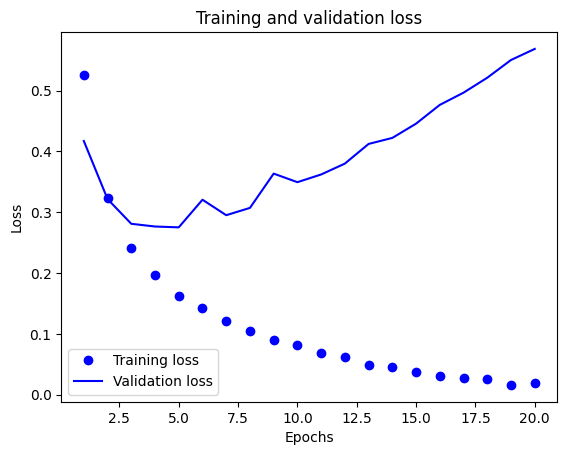

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

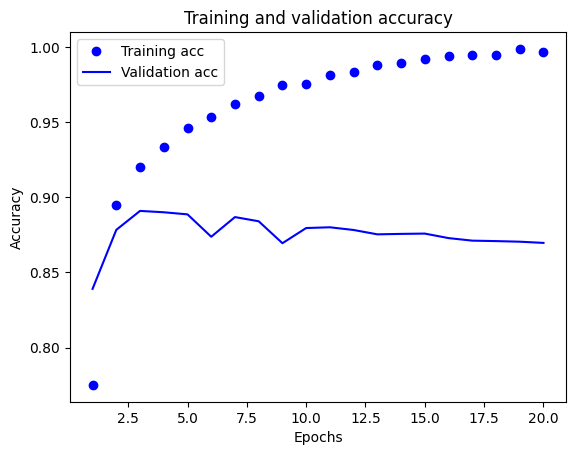

In [ ]:
plt.clf() #Clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#Using a trained model to generate predictions on new data
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.01632509],
       [0.99999994],
       [0.9483303 ],
       ...,
       [0.00306762],
       [0.02918587],
       [0.98184425]], dtype=float32)

##Single-Label Multi-Class Classification
we'll build a model to classify Reuters newswires into 46 mutually
exclusive topics. Because we have many classes, this problem is an instance of **multiclass classification**, and because each data point should be classified into only one category, the problem is more specifically an instance of **single-label multiclass classification**.
If each data point could belong to multiple categories (in this case, topics), we'd be
facing a **multilabel multiclass classification** problem.

##The Reuters Dataset
The *Reuters dataset*, a set of *short newswires* and their *topics*, published by Reuters in 1986. It's a simple, widely used toy dataset for *text classification*. There are 46 different topics; some topics are more represented than others, but each topic chas at least 10 examples in the training set.Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let's take a look.

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
#Decoding Newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

To **vectorize** the labels, there are two possibilities:
* You can cast the label list as an integer tensor, or you can use one-hot encoding.
* **One-hot encoding** is a widely used format
for **categorical data**, also called **categorical encoding**. In this case, **one-hot encoding** of
the labels consists of **embedding** each label as an **all-zero vector** with a 1 in the place of
the **label index**.

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
#One-Hot encoding
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
  results[i, label] = 1.
 return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
#The built in way to one hot encode in keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In a stack of Dense layers like those we’ve been using, each layer can only access
information present in the output of the previous layer. If one layer drops some
information relevant to the classification problem, this information can never be
recovered by later layers: each layer can potentially become an information bottleneck. In the previous example, we used 16-dimensional intermediate layers, but a
16-dimensional space may be too limited to learn to separate 46 different classes:
such small layers may act as information bottlenecks, permanently dropping relevant information

In [ ]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
]

In [ ]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case, we have 46 classes, and they may not be equally represented. What would be
the accuracy of a random baseline? We could try quickly implementing one to check
this empirically

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
#The coefficients in this vector sum to 1, as they form a probability distribution:
np.sum(predictions[0])

In [ ]:
#The largest entry is the predicted class—the class with the highest probability:
np.argmax(predictions[0])

##A different way to handle the labels and the loss
We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like this:

y_train = np.array(train_labels)

y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss function categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, you should use sparse_categorical_crossentropy:

model.compile(optimizer="rmsprop",

 loss="sparse_categorical_crossentropy",

 metrics=["accuracy"])

This new loss function is still mathematically the same as categorical_crossentropy;
it just has a different interface.

##The importance of having sufficiently large intermediate layers
We mentioned earlier that because the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 units. Now let’s see what happens
when we introduce an information bottleneck by having intermediate layers that are
significantly less than 46-dimensional: for example, 4-dimensional.

The model now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is
mostly due to the fact that we’re trying to compress a lot of information (enough nformation to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The model is able to cram most of the necessary
information into these four-dimensional representations, but not all of it.

## The Boston housing price dataset
Will attempt to **predict the median price** of homes in a given **Boston
suburb** in the **mid-1970s**, given data points about the suburb at the time, such as the **crime rate**, the **local property tax rate**, and so on.

The dataset well use has an interesting difference from the two previous examples. It has relatively few data points: only 506, split between 404 training samples and 102 test samples. And each feature in the
**input data** (for example, the crime rate) has a **different scale**. For instance, some values are proportions, which take values between 0 and 1, others take values between 1 and 12, others between 0 and 100, and so on.

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [ ]:
print(f"The number of samples and number of categories in train data: {train_data.shape}")
print(f"The number of labels and number of categories in train data: {train_targets.shape}")
print(f"The number of samples and number of categories in test data: {test_data.shape}")
print(f"The number of samples and number of categories in test data: {test_targets.shape}")

The number of samples and number of categories in train data: (404, 13)
The number of labels and number of categories in train data: (404,)
The number of samples and number of categories in test data: (102, 13)
The number of samples and number of categories in test data: (102,)


As you can see, we have **404 training samples** and **102 test samples**, each with **13 numerical features**, such as **per capita crime rate**, **average number of rooms per dwelling**, **accessibility to highways**, and so on.
 The targets are the median values of owner-occupied homes, in thousands of dollars:

In [ ]:
print(f"The target price ranges: {train_targets}")

The target price ranges: [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 

The prices are typically between $10,000 and $50,000. If that sounds cheap, remember that this was the mid-1970s, and these prices aren’t adjusted for inflation.

##Prepare the data
It would be problematic to feed into a neural network values that all take **wildly different ranges**. The model might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice for dealing with such data is to do **feature-wise normalization**:
* for each feature in the input data (a column in the input data matrix), we subtract the mean of the feature and divide by the **standard deviation**, so that the feature is centered around 0 and has a unit **standard deviation**.

In [ ]:
#Normalizing the data
mean = train_data.mean(axis=0) #Get the mean
train_data -= mean
std = train_data.std(axis=0) #Standard deviation
train_data /= std
test_data -= mean
test_data /= std

🔑- The quantities used for **normalizing the test data** are **computed using the training data**. You should **never** use any **quantity computed on the test data** in your workflow, even for something as simple as data normalization.

⏰- In general, the **less training data** you have, the worse
**overfitting** will be, and using a **small model** is one way to mitigate overfitting.

In [ ]:
import tensorflow as tf
#Function that automatically builds a dense model for regression tasks
def build_model():
 model = tf.keras.Sequential([
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dense(1)
 ])
 model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
 return model

The model ends with a **single unit and no activation** (it will be a **linear layer**). This is a typical setup for **scalar regression** (a regression where you're trying to **predict a single continuous value**). Applying an **activation function** would **constrain the range the output** can take; for instance, if you applied a **sigmoid activation function** to the last layer, the model could **only learn to predict values between 0 and 1**. Here, because the **last layer** is **purely linear**, the model is free to learn to **predict values** in any range. Note that we compile the model with the **mse loss function—mean squared error**, the **square of the difference between the predictions and the targets**. This is a widely used **loss function** for **regression** problems.

 We're also monitoring a new metric during training:
 * **mean absolute error (MAE)**. It's the **absolute value** of the
difference between the **predictions** and the **targets**. For instance, an **MAE** of 0.5 on this problem would mean your **predictions** are off by $500 on average.

##Validating your approach using K-fold validation
To **evaluate our model** while we keep **adjusting its parameters** (such as the number of epochs used for training), we could split the data into a **training set** and a **validation set**, as we did in the previous examples. But because we have so few data points, the **validation set** would end up being very small (for instance, about 100 examples). As a consequence, the **validation scores** might change a lot depending on which data points we chose for **validation** and which we chose for **training**: the **validation scores** might have a **high variance** with regard to the **validation split**. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use **K-fold cross-validation** t consists of splitting the available data into **K partitions** (typically K = 4 or 5), instantiating **K identical models**, and training each one on K - 1 partitions while evaluating
on the remaining partition. The **validation score** for the model used is then the **average of the K validation scores obtained**.

In terms of code, this is straightforward:

In [ ]:
import numpy as np
#K-fold Cross Validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
for i in range(k):
 print(f"Processing fold #{i}")
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 model = build_model()
model.fit(partial_train_data, partial_train_targets,
 epochs=num_epochs, batch_size=16, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
 all_scores

[2.583326578140259]

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
 print(f"Processing fold #{i}")
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 model = build_model()
 history = model.fit(partial_train_data, partial_train_targets,
 validation_data=(val_data, val_targets),
 epochs=num_epochs, batch_size=16, verbose=0)
 mae_history = history.history["val_mae"]
 all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
mae_history = history.history["val_mae"]
all_mae_histories.append(mae_history)
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

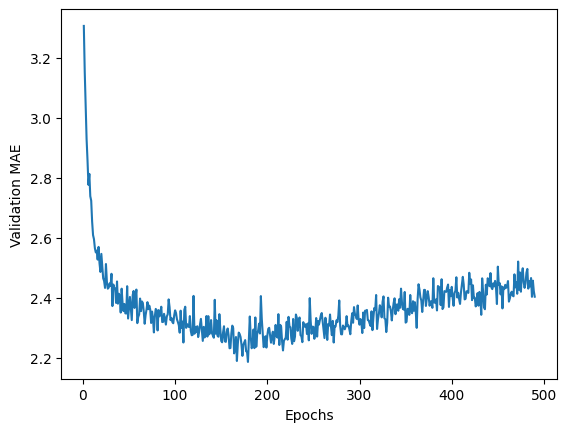

In [ ]:
import matplotlib.pyplot as plt
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

##Holdout Validation Technique
Once you've tuned your  hyperparameters, it's common to
train your final model from scratch on all non-test data available.

* This is the simplest evaluation protocol, and it suffers from one flaw: if little data is
available, then your validation and test sets may contain too few samples to be statistically representative of the data at hand. This is easy to recognize: if different random
shuffling rounds of the data before splitting end up yielding very different measures
of model performance, then you’re having this issue.

In [ ]:
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]


##K-Fold Cross Validation


In [ ]:
k = 3 #The partion number
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
  validation_data = data[num_validation_samples * fold: num_validation_samples * (fold + 1)]
  training_data = np.concatenate(data[:num_validation_samples * fold], data[num_validation_samples * (fold + 1):])
  model = get_model()
  model.fit(training_data, ...)
  validation_score = model.evaluate(validation_data, ...)
  validation_scores.append(validation_score)
  validation_score = np.average(validation_scores)
  model = get_model()
  model.fit(data, ...)
  test_score = model.evaluate(test_data, ...)
